In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer 
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt 

In [2]:
df=pd.read_csv('games.csv')

In [3]:
df.shape

(71716, 39)

# Preporcessing

## Quick Cleaning

In [4]:
df.duplicated().sum()

0

In [5]:
df=df.drop_duplicates()

In [6]:
df.duplicated().sum()

0

## Renaming Columns

In [7]:
df.columns


Index(['AppID', 'Name', 'Release date', 'Estimated owners', 'Peak CCU',
       'Required age', 'Price', 'DLC count', 'About the game',
       'Supported languages', 'Full audio languages', 'Reviews',
       'Header image', 'Website', 'Support url', 'Support email', 'Windows',
       'Mac', 'Linux', 'Metacritic score', 'Metacritic url', 'User score',
       'Positive', 'Negative', 'Score rank', 'Achievements', 'Recommendations',
       'Notes', 'Average playtime forever', 'Average playtime two weeks',
       'Median playtime forever', 'Median playtime two weeks', 'Developers',
       'Publishers', 'Categories', 'Genres', 'Tags', 'Screenshots', 'Movies'],
      dtype='object')

In [8]:
df = df.rename(columns={'Supported languages': 'language', 'Release date': 'Release_Date',
                        'Estimated owners': 'Estimated_Owners',
                        'Peak CCU': 'Peak_CCU','Required age': 'Req_Age',
                        'About the game': 'Overview',
                         'Score rank': 'Score_Rank',
                        'Metacritic score': 'Metacritic_Score',
                        'User score': 'User_Score',
                        'Average playtime forever':'Average_playtime_forever',
                        'Average playtime two weeks':'Average_playtime_2weeks',
                        'Median playtime forever':'Median_playtime_forever', 
                        'Median playtime two weeks': 'Median_playtime_forever',
                        })

In [9]:
df.head()

,AppID,Name,Release_Date,Estimated_Owners,Peak_CCU,Req_Age,Price,DLC count,Overview,language,...,Average_playtime_2weeks,Median_playtime_forever,Median_playtime_forever,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],...,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
2,1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",...,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
3,1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
4,1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",...,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


In [10]:
df=df.iloc[:20000]

In [11]:
df.head()

,AppID,Name,Release_Date,Estimated_Owners,Peak_CCU,Req_Age,Price,DLC count,Overview,language,...,Average_playtime_2weeks,Median_playtime_forever,Median_playtime_forever,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],...,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
2,1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",...,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
3,1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
4,1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",...,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


## Switching User's choice to first row

In [12]:
index1 = df.loc[df['Name'] == 'Train Bandit'].index[0]

In [13]:
print(index1)

1


In [14]:
row_to_move = df.iloc[index1]  # save the row as a Series
df= df.drop(index1, axis=0)  # remove the row from the DataFrame
df = row_to_move.to_frame().transpose().append(df)  # append the row to the top of the DataFrame


C:\Users\edoar\AppData\Local\Temp\ipykernel_39432\329920085.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = row_to_move.to_frame().transpose().append(df)  # append the row to the top of the DataFrame


In [15]:
df=df.reset_index(drop=True)

In [16]:
df.head()

,AppID,Name,Release_Date,Estimated_Owners,Peak_CCU,Req_Age,Price,DLC count,Overview,language,...,Average_playtime_2weeks,Median_playtime_forever,Median_playtime_forever,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],...,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
2,1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",...,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
3,1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
4,1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.0,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",...,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


## Put all the needed words are in the column called Tags

In [17]:
df['Categories'] = df['Categories'].str.replace(" ", "")

In [18]:
df['Categories'] = df['Categories'].str.replace(",", " ")

In [19]:
df['Tags'] = df['Tags'].str.replace(" ", "")

In [20]:
df['Tags']=df['Tags'].str.replace(",", " ")

In [21]:
df['Genres'] = df['Genres'].str.replace(" ", "")

In [22]:
df['Genres'] = df['Genres'].str.replace(",", " ")

In [23]:
df['Tags']=df['Overview']+df['Categories']+df['Genres']+df['Tags']

In [24]:
df['Tags'][0]

"THE LAW!! Looks to be a showdown atop a train. This will be your last fight. Good luck, Train Bandit. WHAT IS THIS GAME? Train Bandit is a simple score attack game. The Law will attack you from both sides. Your weapon is your keyboard. You'll use those keys to kick the living shit out of the law. React quickly by attacking the correct direction. React...or you're dead. THE FEATURES Unlock new bandits Earn Achievements Become Steam's Most Wanted ? Battle elite officers Kick the law's assSingle-player SteamAchievements Fullcontrollersupport SteamLeaderboards RemotePlayonPhone RemotePlayonTablet RemotePlayonTVAction IndieIndie Action PixelGraphics 2D Retro Arcade ScoreAttack Minimalist Comedy Singleplayer Fast-Paced Casual Funny Parody Difficult Gore Violent Western Controller Blood"

Extracted only the year from the release date and change it to int type

## Parsing Date

In [25]:
df['Release_Date'] = df['Release_Date'].str.rsplit(',').str[-1] 

In [26]:
df['Release_Date'] = df['Release_Date'].str.replace(" ", "")

In [27]:
df= df[df['Release_Date'].str.len() <=4]

In [28]:
df['Release_Date'] = df['Release_Date'].astype('int')

Below is your needed dataframe, feel free to add any columns that you feel will be useful.
-All the columns are integers or floats excpet the "Tags" of course.
- You can split and merge the column as you wish to build your recommendation system

In [29]:
cols={'Price','User_Score','Positive','Negative','Score_Rank','Achievements',
      'Recommendations','Tags','Release_Date','Name'}

In [30]:
data=df[cols]

C:\Users\edoar\AppData\Local\Temp\ipykernel_39432\3217044890.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  data=df[cols]


In [31]:
data = data.reindex(columns=['Price','User_Score','Positive','Negative','Achievements',
      'Recommendations','Tags','Release_Date','Name'])

In [32]:
data.shape

(19967, 9)

In [33]:
data.head()

,Price,User_Score,Positive,Negative,Achievements,Recommendations,Tags,Release_Date,Name
0,0.99,0,53,5,12,0,THE LAW!! Looks to be a showdown atop a train....,2017,Train Bandit
1,19.99,0,6,11,30,0,Galactic Bowling is an exaggerated and stylize...,2008,Galactic Bowling
2,4.99,0,0,0,0,0,NaN,2021,Jolt Project
3,5.99,0,3,0,0,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,2020,Henosis™
4,0.0,0,50,8,17,0,ABOUT THE GAME Play as a hacker who has arrang...,2020,Two Weeks in Painland


## Transform to int

In [34]:
data.iloc[:, :6] = data.iloc[:, :6].astype(int)

## Scale

In [35]:
scaler = MinMaxScaler()

In [36]:
data_first_6 = data.iloc[:, :6]
data_scaled_first_6 = pd.DataFrame(scaler.fit_transform(data_first_6), columns=data_first_6.columns)
data = pd.concat([data_scaled_first_6, data.iloc[:, 6:]], axis=1)

# Content Based RecSys

In [37]:
data = data.fillna('')
# Remove consecutive spaces resulting from NaN values
data['Tags'] = df['Tags'].str.replace('\s+', ' ')


C:\Users\edoar\AppData\Local\Temp\ipykernel_39432\1840813370.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Tags'] = df['Tags'].str.replace('\s+', ' ')


In [38]:
contains_nan = data['Tags'].str.contains('NaN')

# Count the number of cells containing 'NaN'
num_nan = contains_nan.sum()
print(num_nan)

2


In [39]:
from sklearn.feature_extraction.text import CountVectorizer 
cv=CountVectorizer(max_features=5000,stop_words='english')


In [40]:
vector=cv.fit_transform(data['Tags'].fillna('')).toarray()

In [41]:
similarity=cosine_similarity(vector)

In [42]:
game_list=sorted(list(enumerate(similarity[0])),reverse=True, key=lambda x:x[1])[1:11]

In [43]:
print(game_list)

[(13166, 0.2988330219628693), (7826, 0.29688376619217477), (7774, 0.2842676218074806), (7930, 0.2805979290422808), (101, 0.2770467068479356), (8814, 0.27595544297684965), (13369, 0.2753211747598376), (11942, 0.27411520674292766), (2361, 0.27091418459143857), (4408, 0.26772644895189607)]


## Put list into dataframe

In [44]:
game_ids=[]

In [45]:
def Get_IDs(game_ids,hlist): 
  for i in hlist:
   game_ids.append(i[0])

In [46]:
Get_IDs(game_ids,game_list)

In [47]:
game_ids

[13166, 7826, 7774, 7930, 101, 8814, 13369, 11942, 2361, 4408]

In [48]:
list_of_games=pd.DataFrame(index=range(10), columns=range(9))

In [49]:
index=-1
for i in game_ids:
  index=index+1
  list_of_games.iloc[index]=data.iloc[i]

In [50]:
list_of_games = list_of_games.rename(columns={0:'Price', 1: 'User_Score',
                                              2:'Positive',
                                              3:'Negative',
                                              4:'Achievements',
                                              5:'Recommendations',
                                              6:'Tags',
                                              7:'Release_Date',
                                              8:'Name'})

## Ordering

In [51]:
list_of_games['XFactor']=list_of_games['Positive']+list_of_games['User_Score']+list_of_games['Recommendations']

In [52]:
price_ordered=list_of_games.sort_values(by=['Price'],ascending=True)

In [53]:
Release_Ordered=list_of_games.sort_values(by=['Release_Date'],ascending=False)

In [54]:
XFactor_Ordered=list_of_games.sort_values(by=['XFactor'],ascending=False)

In [55]:
list_of_games['Price']=(list_of_games['Price']+8.22)

In [56]:
def ListGames(data):
  for index, row in data.iterrows():
    print(row['Name'])

In [57]:
ListGames(list_of_games)

Switch 'N' Shoot
Diamo XL
NAIR
Vector Assault
Bighead Runner
Serious Scramblers
SUPER FLAIL
Donuts'n'Justice
Retro Drift
Interstate Drifter 1999


In [58]:
ListGames(price_ordered)

Diamo XL
SUPER FLAIL
Switch 'N' Shoot
Serious Scramblers
Donuts'n'Justice
Interstate Drifter 1999
Vector Assault
Bighead Runner
NAIR
Retro Drift


In [59]:
ListGames(Release_Ordered)

NAIR
Retro Drift
Interstate Drifter 1999
Serious Scramblers
Bighead Runner
SUPER FLAIL
Diamo XL
Switch 'N' Shoot
Donuts'n'Justice
Vector Assault


In [60]:
ListGames(XFactor_Ordered)

Vector Assault
Bighead Runner
Switch 'N' Shoot
Serious Scramblers
Donuts'n'Justice
Retro Drift
Diamo XL
NAIR
SUPER FLAIL
Interstate Drifter 1999


# User-History Based Recsys

## PCA on data matrix

In [61]:
pca = PCA(n_components=None)

In [62]:
dfx_pca = pca.fit(vector)

In [63]:
r=[]
for i in range(len(dfx_pca.explained_variance_ratio_)):
  r.append(i+1)

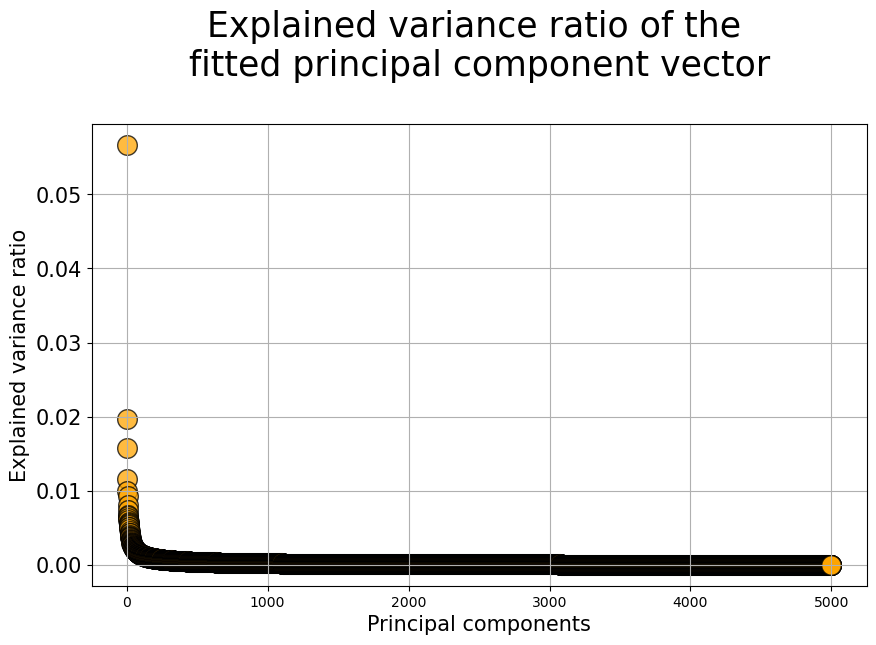

In [64]:
plt.figure(figsize=(10,6))
plt.scatter(x=r,
            y=dfx_pca.explained_variance_ratio_,
           s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Explained variance ratio of the \nfitted principal component vector\n",fontsize=25)
plt.xlabel("Principal components",fontsize=15)
#plt.xticks([i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio",fontsize=15)
plt.show()

In [65]:
total=0
for i in range(len(dfx_pca.explained_variance_ratio_)):
    total=total+dfx_pca.explained_variance_ratio_[i]
    if total>0.8:
     n=i
     print(n)
     break

1053


In [66]:
pca = PCA(n_components=n)

In [67]:
finaldf = pca.fit(vector)

In [68]:
finaldf=pca.transform(vector)

In [69]:
finaldf=pd.DataFrame(finaldf)

In [70]:
finaldf

,0,1,2,3,4,5,6,7,8,9,...,1043,1044,1045,1046,1047,1048,1049,1050,1051,1052
0,-0.729502,0.687477,-0.641385,0.032785,0.236546,0.826429,-1.006304,-0.444173,-0.396475,-0.114984,...,-0.013317,-0.095511,0.102194,0.053551,0.092379,-0.215899,-0.093830,0.010652,-0.061703,0.102752
1,3.857342,-1.164547,-4.204653,-1.304215,-1.401527,0.056480,-0.233718,2.344752,1.066224,0.072569,...,0.039239,0.268393,0.279618,0.013099,-0.336327,0.094653,0.377619,0.054355,0.216135,-0.361547
2,-3.499565,0.541343,-0.541699,0.766620,-0.036341,-0.368553,-0.222674,-0.072639,-0.326582,0.175338,...,0.005098,-0.000553,-0.003263,0.000836,0.002431,0.001026,-0.004480,-0.000787,0.000589,0.001863
3,-0.772277,-1.427576,0.550445,-1.955713,-0.572065,0.527786,1.089030,1.360639,-1.549569,-2.682784,...,0.035640,-0.033801,0.081806,-0.120603,0.048532,-0.096917,-0.050080,0.041547,-0.060458,-0.038493
4,-0.415623,1.884035,-0.220164,-0.199249,-0.125936,-0.846926,-0.528246,-0.391655,0.413168,0.148042,...,-0.014307,0.003466,-0.005235,-0.147722,-0.080138,0.101672,-0.198328,0.087004,0.132395,-0.111874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,3.738281,-0.762746,-4.684094,-0.318962,0.471780,0.268400,-0.339242,5.473336,0.357536,-3.425327,...,0.292467,-0.519440,-0.510903,0.035371,-0.440393,-0.114253,0.337843,0.153019,-0.132569,0.487004
19996,2.267348,-1.473643,0.608813,1.277134,0.544269,3.313697,-1.432982,1.577801,-1.985723,0.152232,...,-0.071100,-0.153788,0.055795,-0.035791,-0.077732,-0.082250,-0.147080,-0.042712,0.058714,-0.283949
19997,-1.390138,-0.144814,0.248404,-0.490436,0.429808,0.122241,-0.238757,-0.512848,0.180542,0.139951,...,0.144903,-0.036817,0.028718,-0.057774,-0.161631,-0.029504,0.097497,-0.071041,0.079178,0.000669
19998,2.502503,2.341593,0.699883,-0.758021,1.625738,-1.399597,-2.092486,-0.296091,-1.430272,-0.274912,...,-0.016766,0.178628,0.130784,0.228492,0.040047,0.225235,-0.114762,-0.081589,0.062671,0.223581


## Create A User History

In [71]:
user_history=finaldf.sample(n=20)

## Get Centroid of the user history matrix

In [72]:
centroid=finaldf.mean()

## Cosine Similarity with Centroid

In [73]:
finaldf.loc[-1] = centroid
finaldf.index = finaldf.index + 1
finaldf = finaldf.sort_index()

In [74]:
new_vector=finaldf.to_numpy()

In [75]:
similarity_centroid=cosine_similarity(new_vector)

In [76]:
game_list_from_centroid=sorted(list(enumerate(similarity_centroid[0])),reverse=True, key=lambda x:x[1])[1:11]

In [77]:
print(game_list_from_centroid)

[(3, 0.5551390047190085), (8, 0.5551390047190085), (19, 0.5551390047190085), (30, 0.5551390047190085), (32, 0.5551390047190085), (44, 0.5551390047190085), (53, 0.5551390047190085), (54, 0.5551390047190085), (71, 0.5551390047190085), (73, 0.5551390047190085)]


In [78]:
def Get_Name(hlist,frame): 
  for i in hlist:
   print(frame.iloc[i[0]+1].Name)

In [79]:
Get_Name(game_list_from_centroid,data)

Two Weeks in Painland
Deadlings: Rotten Edition
Steam Squad
Home Office Tasker
Unhappy Ever After
CasinoRPG
A Journey Through Valhalla
COUNTDOWN
Shibui Coliseum
Endline


# ConvexHull -To check if this game could fit the user

In [80]:
from scipy.spatial import ConvexHull
import scipy.spatial
from scipy.spatial import Delaunay

In [81]:
pca_convex=PCA(n_components=10)


In [82]:
c_df= pca_convex.fit(vector)

In [83]:
c_df=pca_convex.transform(vector)

In [84]:
c_df=pd.DataFrame(c_df)

In [85]:
user_history_convex=c_df.sample(n=20)

In [86]:
hull = ConvexHull(user_history_convex)

In [87]:
def in_hull(p, hull):
    from scipy.spatial import Delaunay
    if not isinstance(hull,Delaunay):
        hull = Delaunay(hull)

    return hull.find_simplex(p)>=0

In [88]:
compatability = pd.DataFrame(index=range(50), columns=['Name','Compatability'])

In [89]:
for i in range(0,50):
  if(in_hull(c_df.iloc[i],user_history_convex)==0):
   compatability.loc[i,'Name']=data.iloc[i].Name
   compatability.loc[i,'Compatability']='Not Compatible'
  else:
    compatability.loc[i,'Name']=data.iloc[i].Name
    compatability.loc[i,'Compatability']='Compatible'
  

In [90]:
compatability

,Name,Compatability
0,Train Bandit,Not Compatible
1,Galactic Bowling,Not Compatible
2,Jolt Project,Compatible
3,Henosis™,Not Compatible
4,Two Weeks in Painland,Not Compatible
5,Wartune Reborn,Not Compatible
6,TD Worlds,Not Compatible
7,Legend of Rome - The Wrath of Mars,Compatible
8,MazM: Jekyll and Hyde,Not Compatible
9,Deadlings: Rotten Edition,Not Compatible
